In [48]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

<h1>Exploratory Data Analysis<h1>

In [49]:
census = pd.read_csv("Family Income and Expenditure.csv")

In [50]:
#getting the objects dtypes columns 
object_cols = census.select_dtypes(include=['object']).columns.tolist()
object_cols

#converting objects into category 
for column in object_cols:
    census[column] = census[column].astype('category')

census.dtypes.head(4)
census['Region'] = census['Region'].str.strip()  # Remove leading/trailing whitespace


<h2>1. Regional Cost of Living: Where Survival Is Hardest</h2>


In [51]:
#jp1  (example update ni steven)

<h2>2. The Regional “Saving Gap”: Which Regions Can Actually Save?</h2>


In [52]:
#jp2

<h2>3. Are Rural or Urban Households More Financially Vulnerable?</h2>


In [53]:
#jp3

<h2>4. The Hidden Poverty Behind the Walls</h2>


In [54]:
#jp4

<h2>5. “Imputed Rental” Inequality</h2>


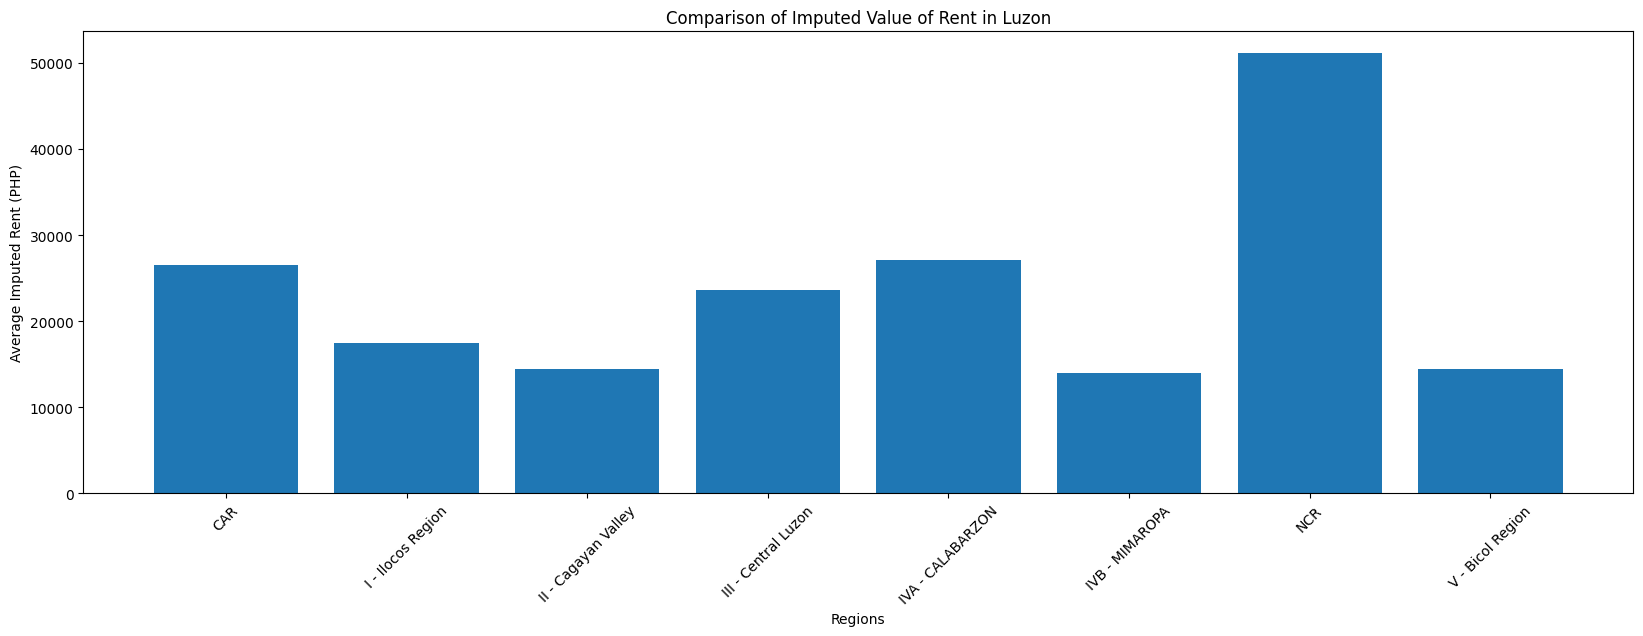

In [55]:
luzon_list = [
    'CAR',                
    'NCR',                
    'I - Ilocos Region',
    'II - Cagayan Valley',
    'III - Central Luzon',
    'IVA - CALABARZON',
    'IVB - MIMAROPA',
    'V - Bicol Region'
]

luzon = census[census['Region'].isin(luzon_list)]

imputed_rental_per_region_luzon = luzon.groupby('Region')['Imputed House Rental Value'].mean()

plt.figure(figsize=(20, 6))
plt.title('Comparison of Imputed Value of Rent in Luzon')
plt.xlabel('Regions')
plt.ylabel('Average Imputed Rent (PHP)')
plt.bar(imputed_rental_per_region_luzon.index, imputed_rental_per_region_luzon.values)
plt.xticks(rotation=45)
plt.show()


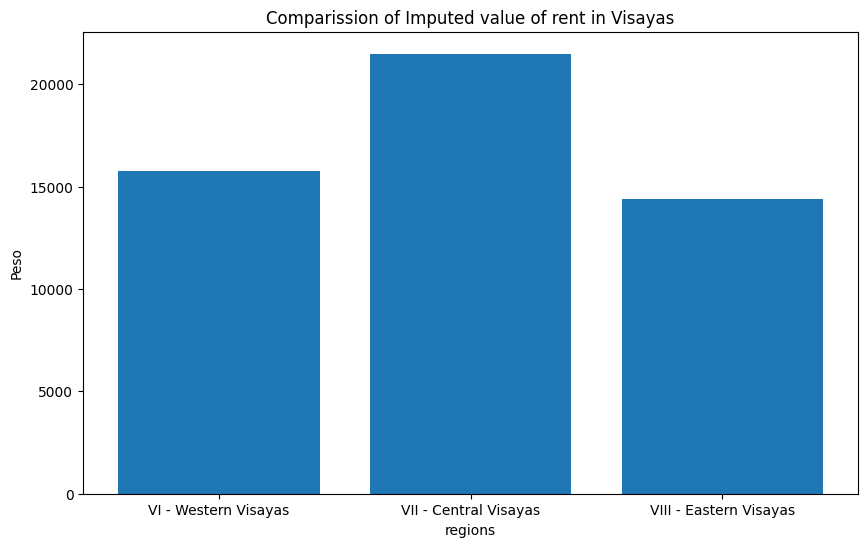

In [56]:

visayas_regions_list = ['VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas']
visayas = census[census['Region'].isin(visayas_regions_list)]
imputed_rental_per_region_visayas = visayas.groupby(['Region'])['Imputed House Rental Value'].mean()

plt.figure(figsize=(10, 6))  
plt.title('Comparission of Imputed value of rent in Visayas')
plt.xlabel('regions')
plt.ylabel('Peso')
plt.bar(imputed_rental_per_region_visayas.index, imputed_rental_per_region_visayas.values)
plt.show()


['Caraga' 'ARMM' 'X - Northern Mindanao' 'XI - Davao Region'
 'XII - SOCCSKSARGEN']


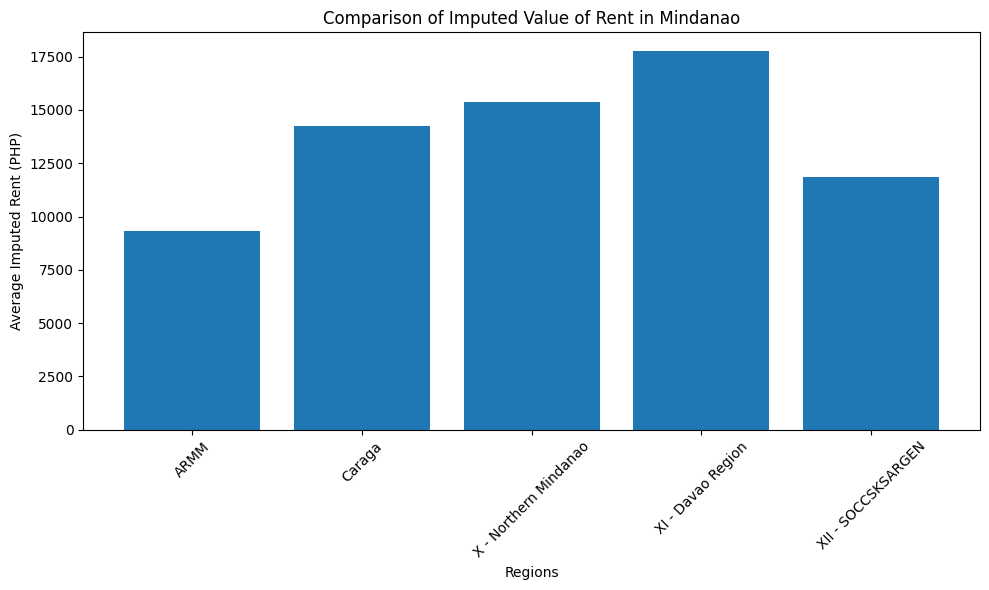

In [57]:

# Now filter with clean comparison list
mindanao_regions_list = [
    'Caraga',
    'ARMM',
    'X - Northern Mindanao',
    'XI - Davao Region',
    'XII - SOCCSKSARGEN',
    'IX - Zamboanga Peninsula'
]

mindanao = census[census['Region'].isin(mindanao_regions_list)]

# Check if only Mindanao regions remain
print(mindanao['Region'].unique())  # Debugging check

# Plot
imputed_rental_per_region_mindanao = mindanao.groupby('Region')['Imputed House Rental Value'].mean()

plt.figure(figsize=(10, 6))
plt.title('Comparison of Imputed Value of Rent in Mindanao')
plt.xlabel('Regions')
plt.ylabel('Average Imputed Rent (PHP)')
plt.bar(imputed_rental_per_region_mindanao.index, imputed_rental_per_region_mindanao.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>6. Toilet & Water Access as a Poverty Indicator</h2>


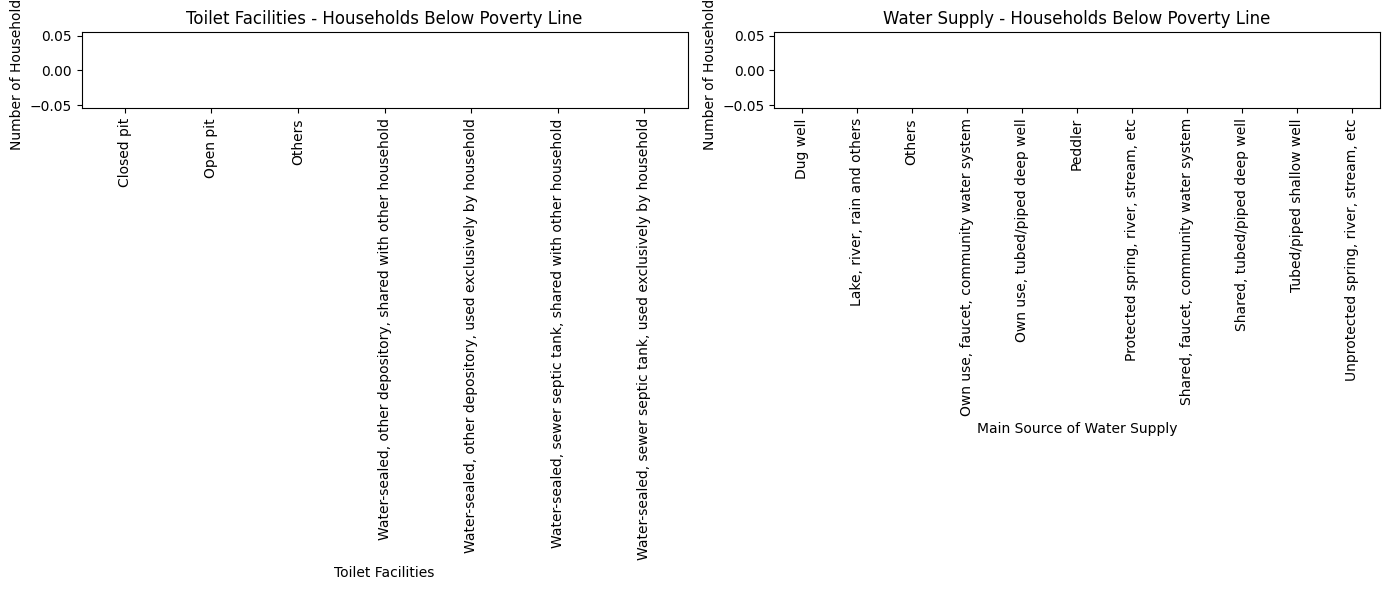

In [ ]:
toilet_region = census.groupby(['Region', 'Toilet Facilities']).size().unstack().fillna(0)

# Normalize to percent per region (optional for comparison)
toilet_region_percent = toilet_region.div(toilet_region.sum(axis=1), axis=0) * 100

# Plot
toilet_region_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Access to Toilet Facilities by Region (in %)')
plt.xlabel('Region')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Toilet Facilities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h2>7. Large Families, Small Budgets</h2>


In [59]:
#steven

<h2>8. Does Education Suffer with More Kids?</h2>


In [60]:
#jp5

<h2>9. Child-Heavy Households and Poverty Correlation</h2>


In [61]:
#steven

<h2>10. Who Are the Working Poor?</h2>


In [62]:
#steven

<h2>11. Entrepreneurial Families: Are They Better Off?</h2>


<Axes: xlabel='Main Source of Income'>

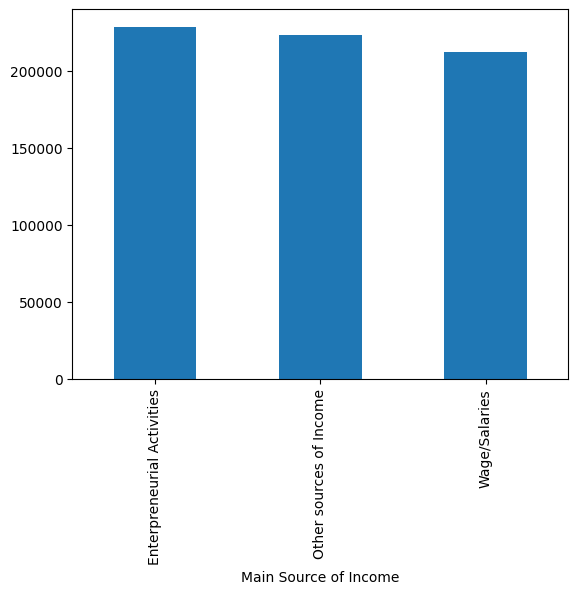

In [63]:
#steven

#are are only slight difference between the total numner ob household income in one employed doing entreprenuerial activies 
entreprenuer = census[census['Total Income from Entrepreneurial Acitivites'] != 0 ]
entreprenuer = entreprenuer[entreprenuer['Total number of family members employed']  == 1]
#kinita pera ng wage salaries compare sa entreprenuers 

entrep_main = entreprenuer.groupby(['Main Source of Income'])['Total Household Income'].mean()

entrep_main.plot(kind='bar')

<h2>12. Occupation vs. Income Ranking</h2>


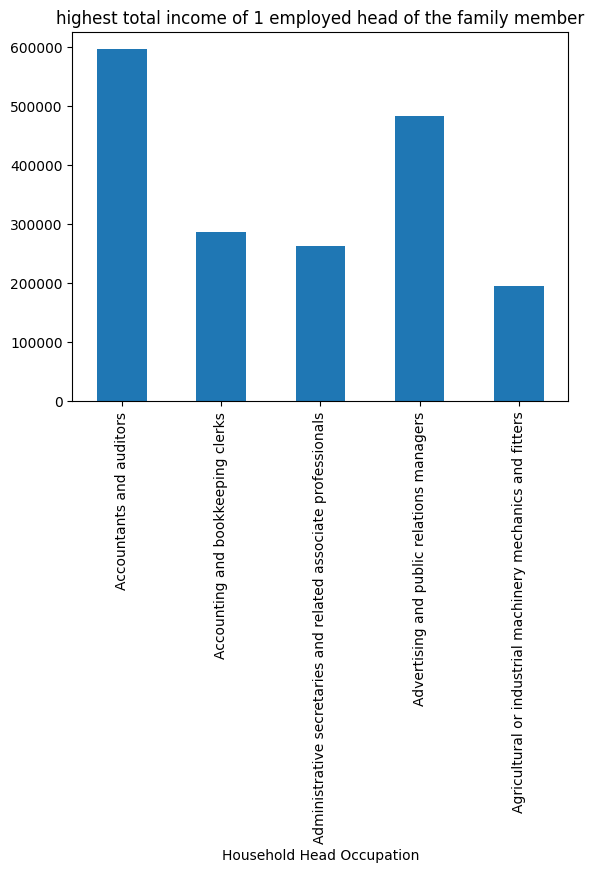

In [64]:
#steven
census['Household Head Occupation'].value_counts()
income_head = census.groupby(['Household Head Occupation'])['Total Household Income'].mean()
income_head

#dito makikita natin na ang may pinakamalaking household na sweldo ay ang mga accountants saka auditor yan yung total bali try natin yung 
#iisa lang ang employe sa familya 
#ok still auditor 
soloworker = census[census['Total number of family members employed'] == 1]
income_head_solo = soloworker.groupby(['Household Head Occupation'])['Total Household Income'].mean().head()
income_head_solo.plot(kind='bar')
plt.title('highest total income of 1 employed head of the family member')
plt.show()

In [65]:
census['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

<h2>Mas alchoholic ba ang mga mahihirap at mabibisyo ba ang mahihirap kesa sa mayaman?<h2>

<h2>13. Food vs. Vices</h2>


In [66]:
#steven

<h2>14. Education vs. Entertainment Spending</h2>


In [67]:
#jp6

<h2>15. Medical vs. Special Occasions: What Hurts Families Most?</h2>


In [68]:
#jp7

<h2>16. Digital Divide Across Regions</h2>


In [69]:
#steven

census['Number of Cellular phone'].value_counts()

Number of Cellular phone
1     12484
2     10377
0      6939
3      5820
4      3281
5      1467
6       666
7       242
8       153
10       66
9        49
Name: count, dtype: int64

<h2>17. Are Airconditioners and Cars a Sign of Wealth?</h2>


In [70]:
#jp8

<h2>18. Appliance Ownership vs. Basic Needs</h2>


In [71]:
#steven

<h2>19. Does the Head’s Education Affect Household Income?</h2>


In [72]:
#steven

<h2>20. Are Educated Heads Better at Budgeting?</h2>


In [73]:
#steven 

<h2>21. The “Invisible Rich”: Low Income, High Assets</h2>


In [74]:
#steven

<h2>22. High Expenditure, Low Income = Debt?</h2>


In [75]:
#steven

<h2>23. Senior-Headed Households: Are They Poorer?</h2>


In [76]:
#steven

<h2>24. Gender and Poverty</h2>


In [77]:
#jp9

<h2>25. Who Spends More on Transportation?</h2>


In [78]:
#jp10